In [33]:
#!pip install pandas 
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install category-encoders
!pip install lazypredict


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- --------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)



In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)



# Insights e Tratativas

In [4]:
students = pd.read_csv('data.csv', sep=';')
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
students.shape

(4424, 37)

In [6]:
students.nunique().sort_values()

Daytime/evening attendance\t                        2
Displaced                                           2
Debtor                                              2
Educational special needs                           2
International                                       2
Scholarship holder                                  2
Gender                                              2
Tuition fees up to date                             2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Curricular units 2nd sem (without evaluations)     10
Unemployment rate                                  10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Course                                             17
Previous qualification                             17
Application mode            

In [7]:
students.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [8]:
students = students.query("Target != 'Enrolled'")
students.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [9]:
students.Target.value_counts(1)

Target
Graduate    0.60854
Dropout     0.39146
Name: proportion, dtype: float64

In [10]:
students['Target'] = students['Target'].map({'Graduate':0, 'Dropout':1})

In [11]:
students['Unemployment rate'] = students['Unemployment rate']/100
students['Inflation rate'] = students['Inflation rate']/100

In [12]:
students.groupby('Marital status')['Target'].mean()

Marital status
1    0.370116
2    0.547401
3    0.500000
4    0.560000
5    0.500000
6    0.800000
Name: Target, dtype: float64

In [13]:
students.groupby('Gender')['Target'].mean()

Gender
0    0.302394
1    0.561249
Name: Target, dtype: float64

In [14]:
students.groupby('Debtor')['Target'].mean()

Debtor
0    0.344731
1    0.755448
Name: Target, dtype: float64

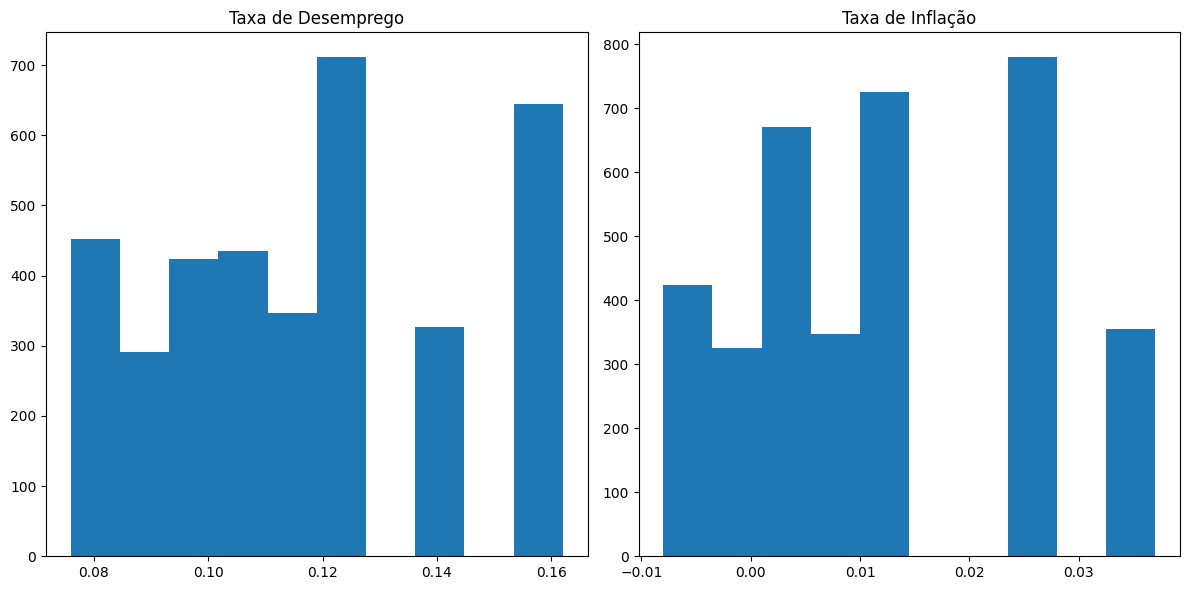

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

plt.sca(axes[0])
plt.hist(students['Unemployment rate'])
plt.title('Taxa de Desemprego')

plt.sca(axes[1])
plt.hist(students['Inflation rate'])
plt.title('Taxa de Inflação')

plt.tight_layout()

plt.show()


In [16]:

print(',\n'.join([f"'{col}'" for col in students.columns]))


'Marital status',
'Application mode',
'Application order',
'Course',
'Daytime/evening attendance	',
'Previous qualification',
'Previous qualification (grade)',
'Nacionality',
'Mother's qualification',
'Father's qualification',
'Mother's occupation',
'Father's occupation',
'Admission grade',
'Displaced',
'Educational special needs',
'Debtor',
'Tuition fees up to date',
'Gender',
'Scholarship holder',
'Age at enrollment',
'International',
'Curricular units 1st sem (credited)',
'Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 1st sem (without evaluations)',
'Curricular units 2nd sem (credited)',
'Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)',
'Curricular units 2nd sem (grade)',
'Curricular units 2nd sem (without evaluations)',
'Unemployment rate',
'Inflation rate',
'GDP',
'Target'


In [17]:
numerical_features = [
                        'GDP',
                        'Gender',
                        'Displaced',
                        'International',
                        'Scholarship holder',
                        'Curricular units 1st sem (credited)',
                        'Curricular units 1st sem (enrolled)',
                        'Curricular units 1st sem (evaluations)',
                        'Curricular units 1st sem (approved)',
                        'Curricular units 1st sem (grade)',
                        'Curricular units 1st sem (without evaluations)',
                        'Curricular units 2nd sem (credited)',
                        'Curricular units 2nd sem (enrolled)',
                        'Curricular units 2nd sem (evaluations)',
                        'Curricular units 2nd sem (approved)',
                        'Curricular units 2nd sem (grade)',
                        'Curricular units 2nd sem (without evaluations)',
                        'Age at enrollment',
                        'Tuition fees up to date',
                        'Debtor',
                        'Previous qualification (grade)',
                        'Educational special needs',
                        'Admission grade',
                        'Daytime/evening attendance	'
                      ]

rate_features = ['Unemployment rate', 'Inflation rate']

ordinal_features = ['Application order']

categorical_features = [
                        'Marital status',
                        'Application mode',
                        'Course',
                        'Previous qualification',
                        'Nacionality',
                        "Mother's qualification",
                        "Father's qualification",
                        "Mother's occupation",
                        "Father's occupation"
]

In [18]:
#Converter para Ordinal para não dar erro.
for col in categorical_features:
    students[col] = students[col].astype('category')
    
for col in ordinal_features:
    students[col] = students[col].astype('category')

In [19]:
target = 'Target'

X = students.drop(target, axis=1)
y = students[target]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder



In [22]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

rate_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('targ_enc', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
       ('num', numerical_transformer, numerical_features),
       ('rat', rate_transformer, rate_features),
       ('ord', ordinal_transformer, ordinal_features),
       ('cat', categorical_transformer, categorical_features) 
    ]
)


In [23]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=50, random_state=42))  
])



In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['GDP', 'Gender', 'Displaced',
                                                   'International',
                                                   'Scholarship holder',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem...
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Application order']),
                                                 ('cat',
                                                  Pipeline(steps=[('targ_enc',
                                                                   TargetEncoder())]),
                                                  ['Marital status',
                                                   'Application mode', 'Course',
                                                   'Previous qualification',
                                                   'Nacionality',
                                                   "Mother's qualification",
                                                   "Father's qualification",
                                                   "Mother's occupation",
                                                   "Father's occupation"])])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=50, random_state=42))])

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC/AUC: {roc_auc_score(y_test, y_pred):.2f}")


Acurácia: 0.90
Recall: 0.82
Precision: 0.91
F1-Score: 0.86
ROC/AUC: 0.89


In [27]:
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))

Matriz de Confusão:
 [[427  22]
 [ 50 227]]


In [28]:
classifier = pipeline.named_steps['classifier']

feature_importances = classifier.feature_importances_

all_features = numerical_features + rate_features + ordinal_features + categorical_features

feature_importance_df = pd.DataFrame({
    'features':all_features,
    'importance':feature_importances
    
})

feature_importance_df.sort_values(by='importance', ascending=False)

,features,importance
14,Curricular units 2nd sem (approved),0.722865
18,Tuition fees up to date,0.082606
12,Curricular units 2nd sem (enrolled),0.033210
8,Curricular units 1st sem (approved),0.028352
6,Curricular units 1st sem (enrolled),0.024205
15,Curricular units 2nd sem (grade),0.017971
29,Course,0.017454
4,Scholarship holder,0.013260
22,Admission grade,0.008338
33,Father's qualification,0.007536


In [31]:
# Inicializa um dicionário vazio para armazenar a importância de cada feature
feature_importances = {}

# Obtém a lista de nomes das colunas (features) do conjunto de teste
features = X_test.columns.tolist()

# Calcula a acurácia do modelo com as previsões originais (baseline)
baseline_metric = accuracy_score(y_test, y_pred)

# Loop sobre cada feature no conjunto de teste
for feature in features:
    
    # Faz uma cópia do conjunto de teste para não modificar o original
    X_test_copy = X_test.copy()
    
    # Embaralha aleatoriamente os valores da feature atual, removendo qualquer correlação com o rótulo
    X_test_copy[feature] = np.random.permutation(X_test_copy[feature])
    
    # Faz novas previsões usando o conjunto de teste com a feature embaralhada
    y_pred_permuted = pipeline.predict(X_test_copy)
    
    # Calcula a acurácia do modelo com a feature embaralhada
    permuted_metric = accuracy_score(y_test, y_pred_permuted)
    
    # Calcula a diferença entre a acurácia original e a acurácia com a feature embaralhada
    # Quanto maior a diferença, mais importante é a feature para o modelo
    feature_importances[feature] = baseline_metric - permuted_metric

    
    
     
    
    

In [32]:
pd.Series(feature_importances).sort_values(ascending=False)

Curricular units 2nd sem (approved)               0.252066
Tuition fees up to date                           0.046832
Curricular units 1st sem (enrolled)               0.013774
Curricular units 2nd sem (enrolled)               0.011019
Curricular units 2nd sem (credited)               0.005510
Curricular units 2nd sem (evaluations)            0.005510
Course                                            0.005510
Application mode                                  0.004132
Curricular units 1st sem (approved)               0.004132
Unemployment rate                                 0.001377
Curricular units 1st sem (credited)               0.001377
Daytime/evening attendance\t                      0.001377
Inflation rate                                    0.001377
Father's occupation                               0.001377
Debtor                                            0.001377
Marital status                                    0.000000
Application order                                 0.0000

In [36]:
# Seu pré-processamento permanece o mesmo, com TargetEncoder para variáveis categóricas
from category_encoders import TargetEncoder
from lazypredict.Supervised import LazyClassifier

# O pipeline que você já tinha:
categorical_transformer = Pipeline(steps=[
    ('targ_enc', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
       ('num', numerical_transformer, numerical_features),
       ('rat', rate_transformer, rate_features),
       ('ord', ordinal_transformer, ordinal_features),
       ('cat', categorical_transformer, categorical_features)
    ]
)

# Separando os dados de treino e teste
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Usando o LazyClassifier
clf = LazyClassifier(ignore_warnings=True, random_state=42)

# Treinando e comparando os modelos
models, predictions = clf.fit(X_train_processed, X_test_processed, y_train, y_test)

# Exibe a tabela de desempenho dos modelos
print(models)

# Se quiser visualizar os melhores modelos por acurácia:
models_sorted = models.sort_values(by='Accuracy', ascending=False)
print(models_sorted.head())



TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [41]:
# Seu pré-processamento permanece o mesmo, com TargetEncoder para variáveis categóricas
from category_encoders import TargetEncoder
from lazypredict.Supervised import LazyClassifier

# O pipeline que você já tinha:
categorical_transformer = Pipeline(steps=[
    ('targ_enc', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
       ('num', numerical_transformer, numerical_features),
       ('rat', rate_transformer, rate_features),
       ('ord', ordinal_transformer, ordinal_features),
       ('cat', categorical_transformer, categorical_features)
    ]
)

# Separando os dados de treino e teste
X_train_processed = preprocessor.fit_transform(X_train, y_train)  # Inclui y_train
X_test_processed = preprocessor.transform(X_test)


# Usando o LazyClassifier
clf = LazyClassifier(ignore_warnings=True, random_state=42)

# Treinando e comparando os modelos
models, predictions = clf.fit(X_train_processed, X_test_processed, y_train, y_test)

# Exibe a tabela de desempenho dos modelos
print(models)

# Se quiser visualizar os melhores modelos por acurácia:
models_sorted = models.sort_values(by='Accuracy', ascending=False)
print(models_sorted.head())


100%|██████████| 31/31 [00:03<00:00,  8.36it/s]

[LightGBM] [Info] Number of positive: 1144, number of negative: 1760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 2904, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393939 -> initscore=-0.430783
[LightGBM] [Info] Start training from score -0.430783
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
XGBClassifier                      0.91               0.89     0.89      0.91        0.13
LGBMClassifier                     0.90               0.89     0.89      0.90        0.10
CalibratedClassifierCV             0.90               0.89     0.89      0.90        